# 4. Seleção de Variáveis

## Importando variáveis e dados

In [7]:
import pandas as pd
from sklearn import feature_selection
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_modelo = pd.read_csv('df_modelo')

## Triagem de variáveis

Precisamos selecionar as variáveis com maior correlação com a determinação do resultado. A separação é feita para remover as irrelevantes. Remover esses recursos torna o resultado mais preciso também

<Axes: ylabel='feature'>

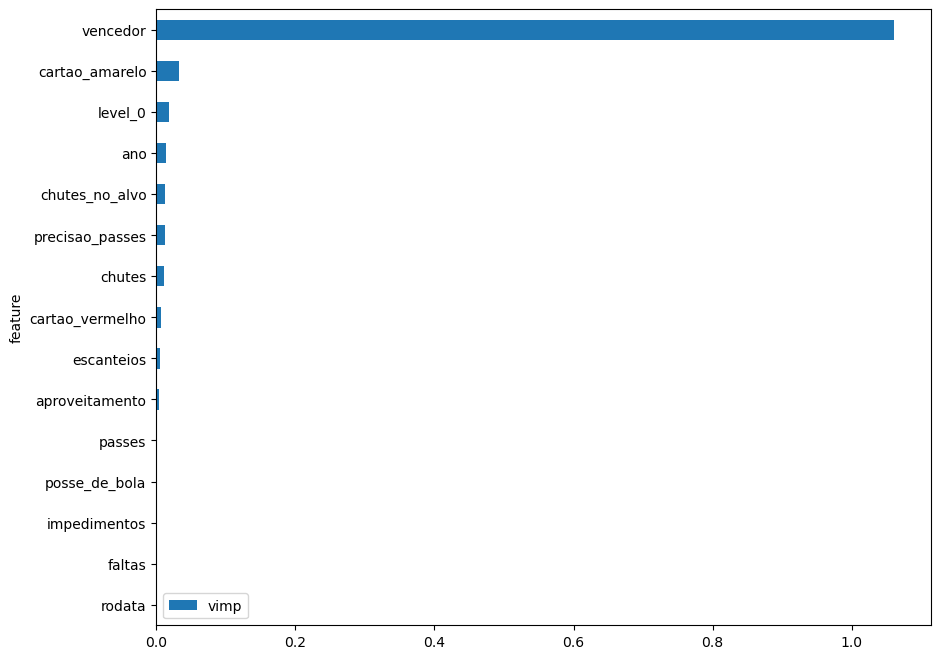

In [11]:
X = df_modelo.drop('resultado', axis=1)
y = df_modelo.reset_index()['resultado']

mic = feature_selection.mutual_info_classif(X, y, random_state = 1333)

fig, ax = plt.subplots(figsize=(10, 8))

features = pd.DataFrame({
    'feature': X.columns,
    "vimp": mic
})

features.set_index('feature').sort_values(by = 'vimp').plot.barh(ax = ax)

O gráfico resultante mostra as variáveis por grau de importância na determinação da variável Y (vencedor da partida). Irei filtrar as variáveis com grau maior que 0

In [13]:
mask = features.set_index('feature').apply(lambda x: x>0).reset_index()

features = features[mask.vimp]

X = X[(features.set_index('feature').index)]

# 5. Aplicação dos Modelos

## KNN

In [16]:
# Importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       246
           1       0.94      0.92      0.93       146
           2       0.90      0.77      0.83       168

    accuracy                           0.91       560
   macro avg       0.91      0.89      0.90       560
weighted avg       0.91      0.91      0.90       560

Matriz de Confusão:


<Axes: >

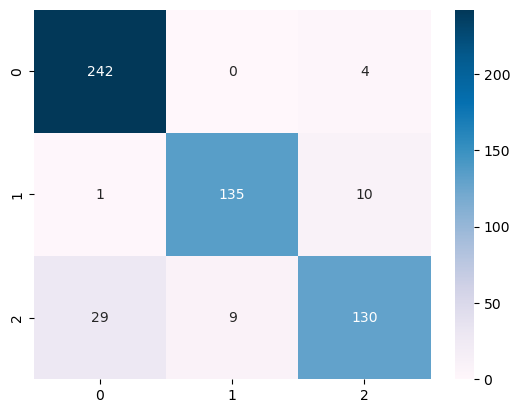

In [17]:
# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1333, shuffle=False)

# 2. Padronizar as características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar o modelo KNN com k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

# 4. Relatorio do modelo
print(classification_report(y_test, y_pred))

# 4. Calcular a matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="PuBu")

In [18]:
# Avaliar acurácia no conjunto de treino
train_accuracy = knn.score(X_train, y_train)
print(f'Acurácia no conjunto de treino: {train_accuracy:.2f}')

# Avaliar acurácia no conjunto de teste
test_accuracy = knn.score(X_test, y_test)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

Acurácia no conjunto de treino: 0.97
Acurácia no conjunto de teste: 0.91


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)

# Relatório de classificação
class_report = classification_report(y_test, y_pred)
print('Relatório de Classificação:')
print(class_report)

Matriz de Confusão:
[[242   0   4]
 [  1 135  10]
 [ 29   9 130]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       246
           1       0.94      0.92      0.93       146
           2       0.90      0.77      0.83       168

    accuracy                           0.91       560
   macro avg       0.91      0.89      0.90       560
weighted avg       0.91      0.91      0.90       560



In [20]:
from sklearn.model_selection import cross_val_score

# Realizar validação cruzada
cv_scores = cross_val_score(knn, X, y, cv=10)
print(f'Pontuações de Validação Cruzada: {cv_scores}')
print(f'Média das Pontuações de Validação Cruzada: {cv_scores.mean():.2f}')

Pontuações de Validação Cruzada: [0.49285714 0.43571429 0.45       0.46428571 0.52142857 0.49285714
 0.42142857 0.48571429 0.44285714 0.50714286]
Média das Pontuações de Validação Cruzada: 0.47


In [21]:
# Testar diferentes valores de k
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f'k={k}, Acurácia: {score:.2f}')

k=1, Acurácia: 0.88
k=2, Acurácia: 0.86
k=3, Acurácia: 0.91
k=4, Acurácia: 0.92
k=5, Acurácia: 0.93
k=6, Acurácia: 0.93
k=7, Acurácia: 0.94
k=8, Acurácia: 0.94
k=9, Acurácia: 0.94
k=10, Acurácia: 0.94
k=11, Acurácia: 0.93
k=12, Acurácia: 0.93
k=13, Acurácia: 0.92
k=14, Acurácia: 0.90
k=15, Acurácia: 0.89
k=16, Acurácia: 0.88
k=17, Acurácia: 0.88
k=18, Acurácia: 0.88
k=19, Acurácia: 0.87
k=20, Acurácia: 0.85


In [22]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir novamente em treino e teste após balanceamento
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Treinar o modelo KNN novamente
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Avaliar o modelo novamente
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia após balanceamento: {accuracy:.2f}')

Acurácia após balanceamento: 0.56


Agora devemos calibrar o modelo

## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

# Inicializar o modelo Gaussian Naive Bayes
gnb = GaussianNB()

# Treinar o modelo
gnb.fit(X_train, y_train)

# Fazer previsões
y_pred = gnb.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)

# Relatório de classificação
class_report = classification_report(y_test, y_pred)
print('Relatório de Classificação:')
print(class_report)

Acurácia: 1.00
Matriz de Confusão:
[[133   0   0]
 [  0  68   0]
 [  0   0  79]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        79

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [36]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#Validação cruzada
# Definir k-fold cross-validation com k=10

k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Avaliar o modelo usando cross_val_score
scores = cross_val_score(gnb, X, y, cv=kf, scoring='accuracy')

print(f'Acurácia Média: {scores.mean():.2f}')
print(f'Desvio Padrão das Acurácias: {scores.std():.2f}')


Acurácia Média: 1.00
Desvio Padrão das Acurácias: 0.00


## Random Forests

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
rf.fit(X_train, y_train)

# Fazer previsões
y_pred = rf.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)

# Relatório de classificação
class_report = classification_report(y_test, y_pred)
print('Relatório de Classificação:')
print(class_report)

Acurácia: 1.00
Matriz de Confusão:
[[133   0   0]
 [  0  68   0]
 [  0   0  79]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        79

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [43]:
# Definir k-fold cross-validation com k=10
k = 10

# Avaliar o modelo usando cross_val_score
scores = cross_val_score(rf, X, y, cv=k, scoring='accuracy')

print(f'Acurácia Média: {scores.mean():.2f}')
print(f'Desvio Padrão das Acurácias: {scores.std():.2f}')
scores

Acurácia Média: 1.00
Desvio Padrão das Acurácias: 0.00


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       168

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

Matriz de Confusão:


<Axes: >

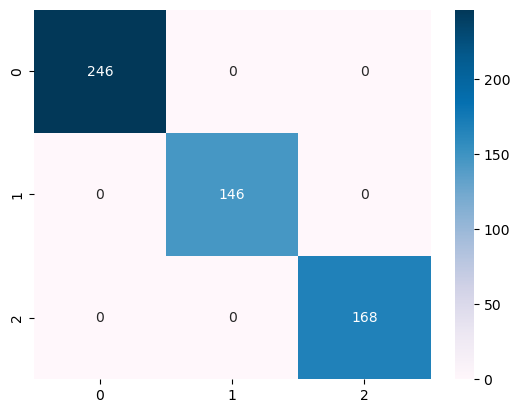

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 1. Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 1333, shuffle = False)

# 2. Padronizar as características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Treinar o modelo LinearSVC
model = LinearSVC(random_state = 0, class_weight = 'balanced')
model.fit(X_train, y_train)

# 4. Fazer previsões com o modelo nos dados de teste
y_pred = model.predict(X_test)

# 4. Relatorio do modelo
print(classification_report(y_test, y_pred))

# 4. Calcular a matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="PuBu")